### Initial Settings

In [5]:
import sys
sys.path.append('./MachineLearning ToolBox')

from Pipeline1_read import read
from Pipeline2_explore import title_varname,explore_var, gen_vdict, diff_in_mean, x_dist, comparison_all_values
from Pipeline3_preprocess import check_miss, fill_miss, convert_vartype
from Pipeline4_features import display_importance, discretize, gen_dummies
from Pipeline5_classifier import classify
from Pipeline6_evaluate import evaluate, plot_roc

%matplotlib inline

/home/student/.local/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step 1. Read/Load Data

In [6]:
# Read Data into Pandas object
data = read('data/credit-data.csv')

## Step 2. Explore Data

In [7]:
# Peek at columns to understand potential features and labels
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [8]:
# Our dependent variable (label) is 'SeriousDlqin2yrs'
# Our independent variables (features) are all column names other 
# than 'PersonID' and the label

li = 1
fi = [2,3,4,5,6,7,8,9,10,11,12]
label = data.columns[li]
features = list(data.columns[fi])

In [22]:
import re
re.compile("([A-Z](?=[^A-Z]))").split("WowILoveNotUsingSpacesAAAA")

['', 'W', 'owI', 'L', 'ove', 'N', 'ot', 'U', 'sing', 'S', 'pacesAAAA']

In [44]:
' '.join(re.findall(r"[A-Z0-9][^A-Z0-9]*", "WowILoveMyID,2HighsAndNotUsingSpaces"))

'Wow I Love My I D, 2 Highs And Not Using Spaces'

In [39]:
' '.join(re.findall("(?<=([a-z]))(?=[A-Z]|[0-9]|\\()", "WowILoveNotUsingSpacesAAAA"))

'w e t g s'

In [75]:
def explore_var(df,varname,label,method):
    '''
    Generate distribution graph for specific variable
    Input:
        df: pd dataframe
        variable(string): the variable/attribute you want to explore
        graph_type(string): the type of graph you want to draw
    Return:
        d_var: a dictionary contains distribution for the selected attribute
        and the corresponding garph and feature list for that attribute. 
    '''
    rv = {}
    cols = [varname, label]
    m = df[cols].groupby(varname).mean()
    clean_name = ' '.join(re.findall(r"[A-Za-z0-9][A-Za-z0-9][^A-Z0-9]*", varname))
    
    rv["distribution"] = m
    rv["graph"] = m.plot(kind=method,
                         use_index=False,
                         figsize=(8,4),
                        title=clean_name)
    
    return rv

In [56]:
list(data.columns)

['PersonID',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [71]:
for x in data.columns:
    print(' '.join(re.findall(r"[A-Za-z0-9][A-Za-z0-9][^A-Z0-9]*", x)))

Person ID
Serious Dlqin 2yrs
Revolving Utilization Of Unsecured Lines
age
zipcode
Number Of Time 30- 59 Days Past Due Not Worse
Debt Ratio
Monthly Income
Number Of Open Credit Lines And Loans
Number Of Times 90 Days Late
Number Real Estate Loans Or Lines
Number Of Time 60- 89 Days Past Due Not Worse
Number Of Dependents


In [80]:
data.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [79]:
l = [1,2,3,4,5,6,7,8]
l[1:2]

[2]

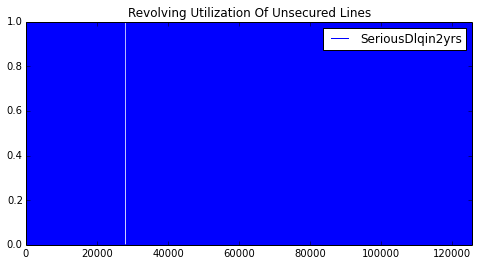

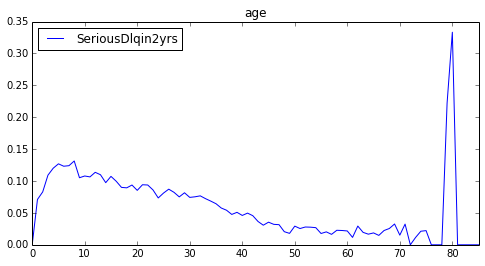

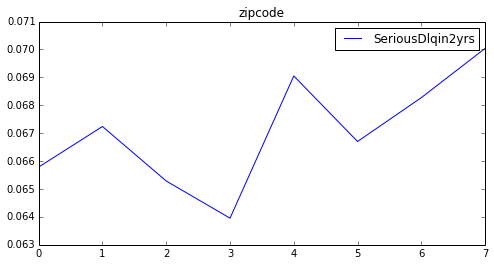

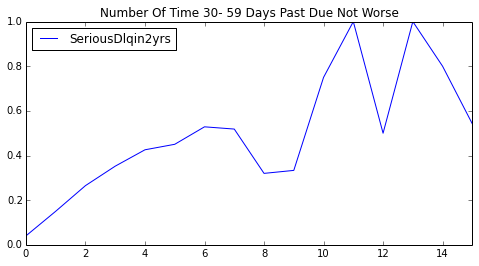

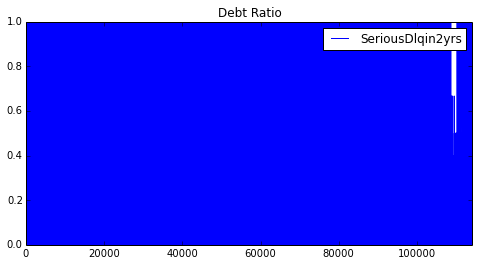

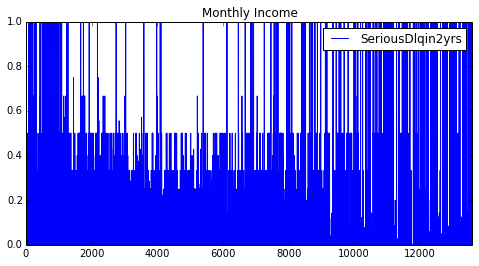

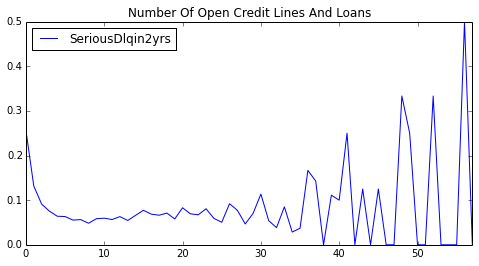

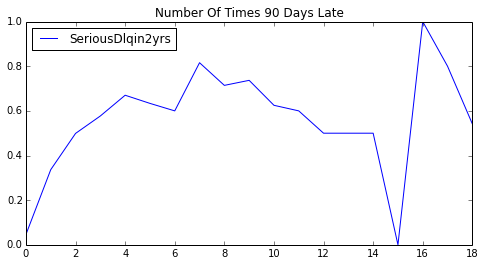

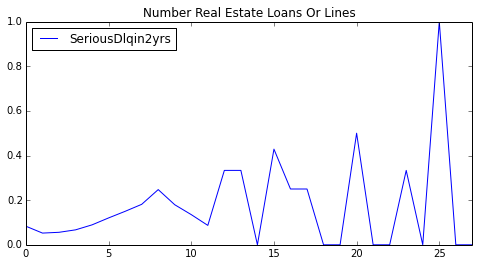

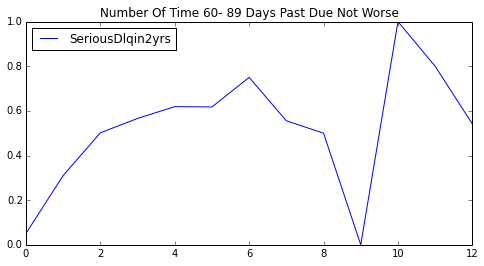

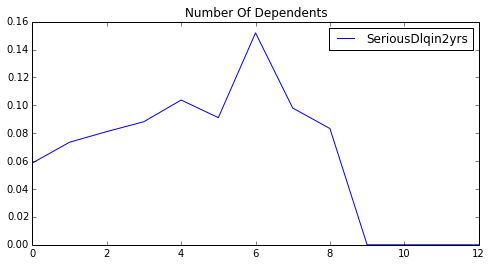

In [76]:
for varname in ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberOfTimes90DaysLate',
                'NumberRealEstateLoansOrLines',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfDependents']:
    explore_var(data,varname,label,'line')["graph"]

In [85]:
for varname in ['DebtRatio']:
    explore_var(data,varname,label,'boxplot')["graph"]

ValueError: 'boxplot' is not a valid plot kind

In [9]:
comparison_all_values(data, [2,7,9,11,4,10,8],d)

NameError: name 'df' is not defined

In [ ]:
x_dist(df, [1,2,5,6,7,9,11],d)

In [ ]:
diff_in_mean(df, [2,6,11], d)
diff_in_mean(df, [4,10,8], d)
diff_in_mean(df, [1,5,7,9], d)

In [31]:
describe_column(data, 'DebtRatio')

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Unique values: 114194

Missing values: 0


In [32]:
tab_table = tabular(data, 'NumberOfDependents')
tab_table

,NumberOfDependents,Percent
0.0,86902,0.594909
1.0,26316,0.180153
2.0,19522,0.133643
3.0,9483,0.064918
4.0,2862,0.019593
5.0,746,0.005107
6.0,158,0.001082
7.0,51,0.000349
8.0,24,0.000164
9.0,5,0.000034


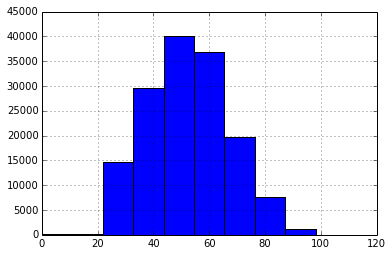

In [33]:
data['age'].hist()

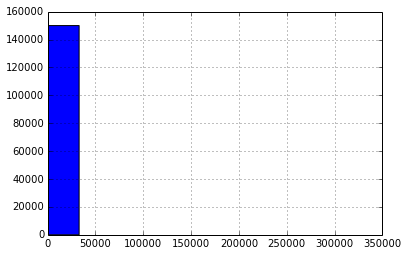

In [34]:
data['DebtRatio'].hist()

### Step 3. Pre-process data

In [80]:
convert_vartype(data, label, 'bool')
convert_vartype(data, 'NumberOfDependents', 'int')

In [84]:
# Check for missing values
check_miss(data)

MonthlyIncome has missing values!
NumberOfDependents has missing values!


In [89]:
# Fill missing values
fill_miss(data, 'MonthlyIncome', method='mean')
fill_miss(data, 'NumberOfDependents', method='median')

### Step 4. Create Features

In [104]:
data.dtypes

PersonID                                   int64
SeriousDlqin2yrs                           int64
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
zipcode                                    int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
MonthlyIncome_cat                       category
DebtRatio_cat                           category
NumberOfDependents_0                        bool
NumberOfDependents_1                        bool
NumberOfDependents_2                        bool
NumberOfDependents_3                        bool
NumberOfDependents_4                        bool
NumberOfDependents_5

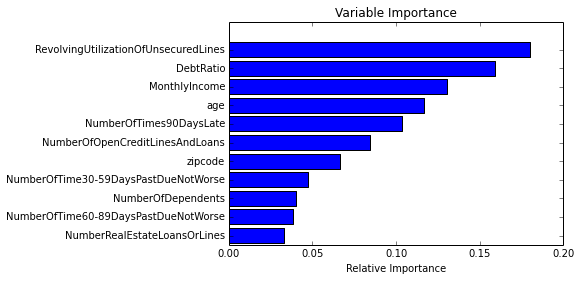

In [91]:
display_importance(data, label, features)

In [ ]:
discretize(data, 'MonthlyIncome', 5)
discretize(data, 'DebtRatio', 5)
discretize(data, 'age', 5)

In [94]:
discretize(data, 'MonthlyIncome', nbins=5, cut_type='quantile')
discretize(data, 'DebtRatio', nbins=5, cut_type='logspace')

Warning, DebtRatio has negative or zero values


In [ ]:
## From Lab

cat_cols = [  'teacher_prefix', 'primary_focus_area','poverty_level']
cleaned_main_variables = binarize_categories(main_variables, cat_cols, drop=True)

In [97]:
gen_dummies(data, 'NumberOfDependents')
gen_dummies(data, 'DebtRatio_cat')
gen_dummies(data, 'MonthlyIncome_cat')

In [ ]:
data.dtypes

### Step 5. Classify

In [41]:
# The task here is to predict who will  experience financial 
# distress in the next two years. The outcome variable (label) 
# in the data is SeriousDlqin2yrs. We have access to other information 
# about this person (as described in the data dictionary). Your assignment 
#is to take this data and build a machine learning pipeline that 
#trains *one* machine learning model on the data. 
from sklearn.model_selection import train_test_split


X = data.loc[:, ('NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5')]

Y = data['SeriousDlqin2yrs']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)
    
model = MyClassifier(X_train, Y_train, 'logistic')

model.model.score(X_test, Y_test)

0.93222735021412828

In [50]:
print(model.model.coef_)

  (0, 0)	0.127809847759
  (0, 1)	-0.0249639248121
  (0, 2)	-0.6330416073
  (0, 3)	0.0735662264515
  (0, 4)	0.0156168493632
  (0, 5)	-0.431096931943
  (0, 6)	-0.192146223752
  (0, 7)	-0.0627019385459
  (0, 8)	-0.250363667995
  (0, 9)	-1.00262573203
  (0, 10)	-0.928702764814
  (0, 11)	-0.819218492033


### Step 6. Evaluate

In [42]:
model.model.score(X_test, Y_test)

0.93222735021412828

In [51]:
import pandas as pd

probas = model.model.predict_proba(X_test)

pd.crosstab(Y_test, probas[:,1] > 0.2, rownames=["Actual"], colnames=["Predicted"])

Predicted,False,True
Actual,,
False,22415,6
True,1628,2


In [57]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

In [53]:
accuracy_score(Y_test, probas[:,1] > 0.2)

0.93206103696312004

In [56]:
print(classification_report(Y_test, probas[:,1] > 0.2))

             precision    recall  f1-score   support

      False       0.93      1.00      0.96     22421
       True       0.25      0.00      0.00      1630

avg / total       0.89      0.93      0.90     24051



In [59]:
precision_recall_curve(Y_test, probas[:,1])

(array([ 0.06846151,  0.06842525,  0.06843388, ...,  0.5       ,
         0.        ,  1.        ]),
 array([  1.00000000e+00,   9.99386503e-01,   9.99386503e-01, ...,
          6.13496933e-04,   0.00000000e+00,   0.00000000e+00]),
 array([ 0.01637779,  0.01639506,  0.01653906, ...,  0.21941202,
         0.21992459,  0.23751897]))

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

confusion_matrix(Y_test, model.model.predict(X_test))


In [ ]:
probas = model.model.predict_proba(X_train)

In [ ]:
sum(probas[:,1] > 0.2)

In [ ]:
model.model.predict(X_test)

In [ ]:
d = pd.DataFrame({'a': [5,6,7], 'b':[0,1,3]}, index=[10,13,14])
d = binarize_categories(d, ['a'], True)
d.head()